In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
games_data_raw = pd.read_csv("game.csv")

In [14]:
games_data_raw.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [15]:
games_data_raw.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [16]:
games_data_raw.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [17]:
game_nulos = games_data_raw.isnull().sum()
game_nulos

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

existen 16715 filas con 10 columnas de las cuales varias columnas cuentas con valores nulos, esto puede ser porque aun no han sido calidficados los juego en el caso de score, en los años porque no se tiene la infomorcaion precisa etc.

In [18]:
games_data_raw.columns= games_data_raw.columns.str.lower()
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [19]:
games_data_raw["year_of_release"]

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

Existe un erros de fecha para la columna year_of_relase ya que esta tiene decimales y hay que convertirla a int

In [20]:
games_data_raw["year_of_release"] = games_data_raw["year_of_release"].fillna(0).astype('int')

In [21]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


los valores ausentes en los años los e dejado con cero ya que no sabemos que año corresponde

In [22]:
games_data_raw.query('user_score == "tdb"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
games_data_raw.loc[games_data_raw['user_score'] == "tdb", 'user_score'] = np.nan

Para la columna user_score se ha considerado dejar como NAN ya que aun no se a calificado (score) ya que si rellenaramos este se entenderia que ya fue calificado, lo cual no es verdad

In [24]:
games_data_raw['user_score'] = pd.to_numeric(games_data_raw['user_score'], errors='coerce')

In [25]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [26]:
games_data_raw

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
games_data_raw["rating"]

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: rating, Length: 16715, dtype: object

In [28]:
games_data_raw["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
games_data_raw["total_sales"] = games_data_raw[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)

In [30]:
median_critic_score = games_data_raw['critic_score'].median()
median_user_score = games_data_raw['user_score'].median()

In [63]:
critic_score_median = games_data_raw['critic_score'].median()
user_score_median = games_data_raw['user_score'].median()

games_data_raw['critic_score'] = games_data_raw['critic_score'].fillna(critic_score_median)
games_data_raw['user_score'] = games_data_raw['user_score'].fillna(user_score_median)
print(games_data_raw.isnull().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
total_sales           0
calif_promedio        0
dtype: int64


los valores nulos para critic_score y user_score obtuvimos la mediana para no sesgar los resultados

In [33]:
games_data_raw.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38


In [34]:
games_data_raw.nlargest(5, ['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38


In [35]:
games_data_raw.nsmallest(5, ['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.0,0.0,71.0,7.5,NaN,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.0,0.0,71.0,7.5,NaN,0.00
15384,Order of War,PC,2009,Strategy,0.00,0.01,0.0,0.0,69.0,7.3,T,0.01
15486,Arslan: The Warriors of Legend,XOne,2016,Action,0.01,0.00,0.0,0.0,71.0,5.8,T,0.01
15499,Motocross Mania 3,XB,2005,Racing,0.01,0.00,0.0,0.0,38.0,3.6,T,0.01


Al crear la columna total sales, la cual suma las filas sobre las ventas, estas plataformas son las 5 lideres
Basandonos en las plataforma las top serian las siguientes wii, nes y  gb, Por otro lado las plataformas con menores ventas son ps3, ps2, pc, xon y xb 

In [36]:
lanzamiento_año = games_data_raw.groupby('year_of_release')["name"].count().sort_values(ascending=False).reset_index()

In [37]:
lanzamiento_año = lanzamiento_año[lanzamiento_año['year_of_release'] != 0]

In [38]:
lanzamiento_año

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


se ha eliminado los juegos que no tenemos datos (año) sin embargo de forma ascendente determinamos que en el 2008 se lanzaron 1427, el cual fue el año con maslanzamientos y el año con menor lñanzamientos de juegos fue en 1980 con 9

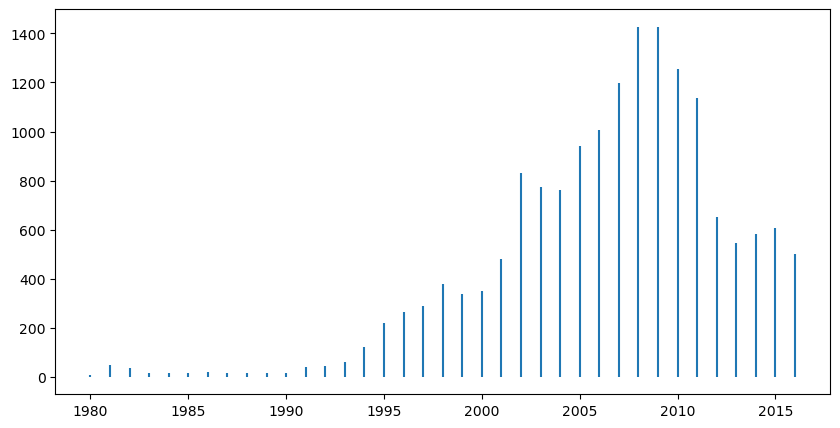

In [39]:
fig, ax= plt.subplots(figsize=(10,5))
ax.vlines(x=lanzamiento_año.year_of_release, ymin=0, ymax=lanzamiento_año.name)
ax.set_tittle = ("Lanzamiento de juego por año")
plt.show()

La grafica nos muestra un analisis sobre el mercado de videojuagos en el tiempo respecto al lanzamiento de videojuegos, podemos observar que el mayor aumento de estos es entre el año 2002 al 2010, donde se ve claramente un gran numero de lanzamientos donde el año 2008 tuvo el mayor numero de lanzamiwntoS. Sin embargo apartir del año 2011 la tendencia es hacia la baja

In [40]:
df_ventas_plataforma = games_data_raw.groupby("platform")["total_sales"].sum().sort_values(ascending=False).reset_index()

In [41]:
df_ventas_plataforma["z_score"] = (df_ventas_plataforma["total_sales"] - df_ventas_plataforma["total_sales"].mean())/df_ventas_plataforma["total_sales"].std()
df_ventas_plataforma

,platform,total_sales,z_score
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304
5,PS,730.86,1.273139
6,GBA,317.85,0.086875
7,PS4,314.14,0.076219
8,PSP,294.05,0.018516
9,PC,259.52,-0.080663


Enla columna z_score podemos identificar como varian las ventas de una plataforma a otra, y con los datos anteriores podemos concluir que a medida de que avanzan ls años existe mas lanzamientos de videojuego y por tanto las ventas totales van aumentando  

In [42]:
df_ventas_plataforma["color"]= ["red" if ventas_z < 0 else "green" for ventas_z in df_ventas_plataforma["z_score"]] 
df_ventas_plataforma

,platform,total_sales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


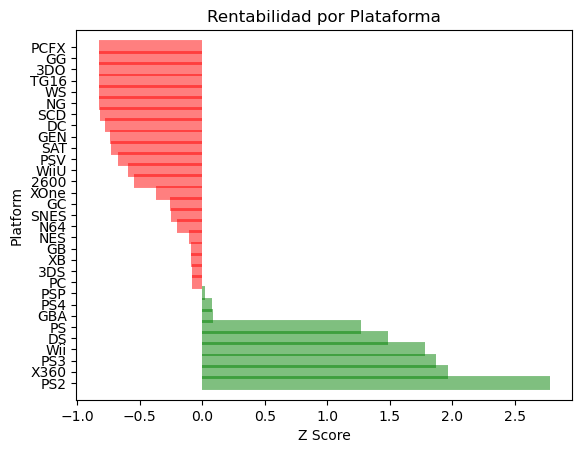

In [43]:
plt.figure()
plt.hlines(
    y=df_ventas_plataforma.platform, 
    xmin=0, 
    xmax=df_ventas_plataforma.z_score, 
    color=df_ventas_plataforma.color,
    linewidth=10, 
    alpha=0.5
)
plt.ylabel("Platform")
plt.xlabel("Z Score")
plt.title("Rentabilidad por Plataforma")
plt.show()

en el grafico podemos observar que los que se encuentran de color verde son positivos, es decir las ventas de estas plataformas son sanas (rentables), las que se encuntran en rojo tienen ventas pormedio que estan por debajo de cero lo cual nos dice que estas plataformas no son rentables. Con estos datos y ls datos anteriores podemos poner por ejemplo xone era un videojuego popular pero al paso del timpo ya no tiene ventas

In [44]:
games_data_clean = games_data_raw.query("year_of_release >= 2013")
tiempo_de_vida = pd.pivot_table(games_data_clean, index="year_of_release", columns="platform", values="total_sales", aggfunc='sum').fillna(0)
tiempo_de_vida

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


E:\Users\Guillen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Guillen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


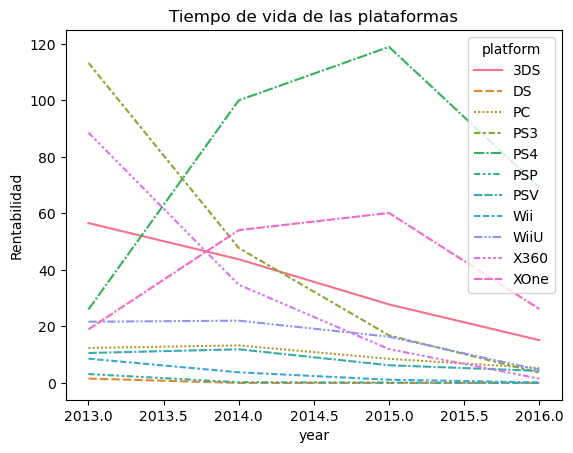

In [64]:
sns.lineplot(data=tiempo_de_vida)
plt.ylabel("Rentabilidad")
plt.xlabel("year")
plt.title("Tiempo de vida de las plataformas")
plt.show()

Podemos observar que las ventas promedio tiene una tendencia a que cada juego han caido con el trascurso del tiempo

In [46]:
plataforma_reseña =games_data_raw.groupby("platform")[["critic_score","user_score", "total_sales"]].count().sort_values("total_sales", ascending=False)
plataforma_reseña

,critic_score,user_score,total_sales
platform,,,
PS2,2161,2161,2161
DS,2151,2151,2151
PS3,1331,1331,1331
Wii,1320,1320,1320
X360,1262,1262,1262
PSP,1209,1209,1209
PS,1197,1197,1197
PC,974,974,974
XB,824,824,824


Con los datos obtenidos en esta tabla podemos deducir que  las reseñas de usuarios y profesionales en efecto afectAn las ventas de las plataformas para el caso de WII sienod una plataforma populas ya que ambos scores son altos las ventas de wii no son altas a compracion de ps2, por otros lado tenemos la plataforma tg16 no tiene score por lo cual el nuemero de ventas es muy bajo

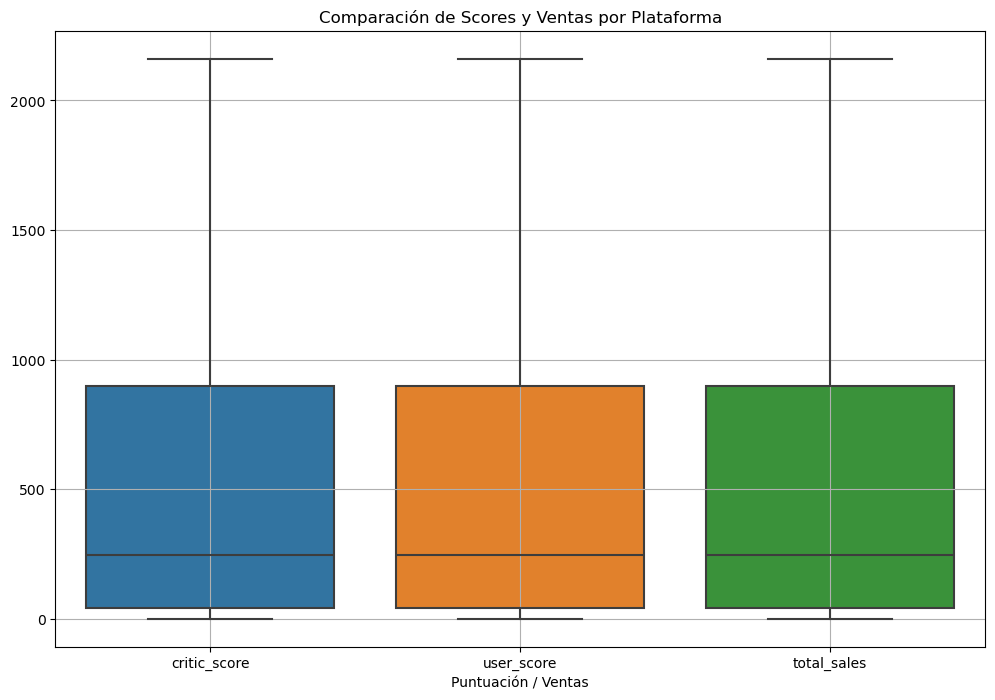

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=plataforma_reseña)
plt.title('Comparación de Scores y Ventas por Plataforma')
plt.xlabel('Puntuación / Ventas')
plt.grid(True)
plt.show()


En estas graficas de cajas no encontramor valores fuera de ellas (outliers) esto debido a que los valores nulos que tenia el archivo original se han modificado al obtener la media, los datos estan entre 0 y 500 y la mediana podemos decir que se encuntra entre 100 y 200 

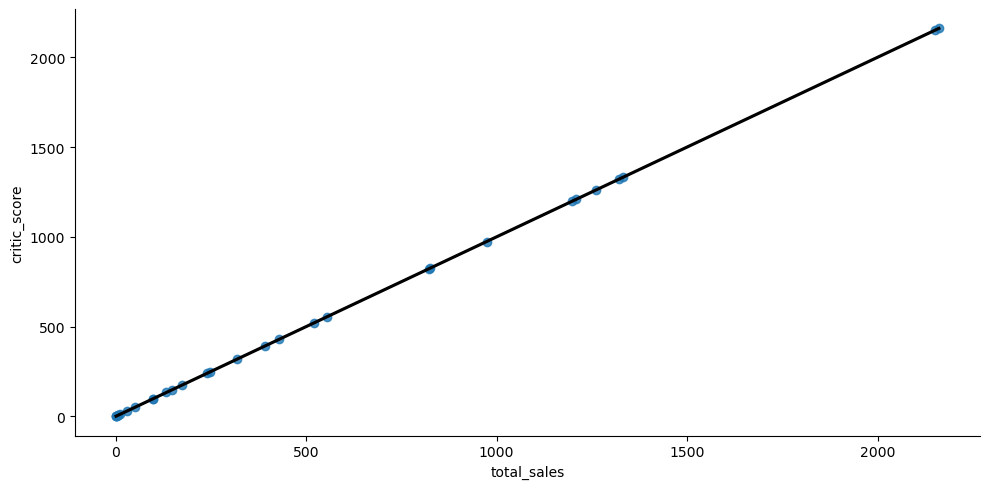

In [48]:
sns.lmplot(
    x="total_sales",
    y="critic_score",
    data=plataforma_reseña,
    lowess=True,
    aspect=2,
    line_kws={'color': 'black'}
)

Para este grafico de dispercion hemos usado unicamente como referencia  total_sales y  critic_score y la gracifa nos muestra que como habiamos mencionado anteriormente cuando las reseñas son altas las ventas sno altos y viceversa, por lo que podemos concluir que una alta reseña en efecto lleva a un alto numero de ventas

Para cada región (NA, UE, JP) determina:
-Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
-Los cinco géneros principales. Explica la diferencia.
-Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [49]:
games_data_raw.nlargest(5, ['na_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN,28.31
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN,30.26
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


De acuerdo a las ventas de na_sales podemos determinar las plataforma principales las cuales son : wii NES y gb

In [50]:
games_data_raw.nlargest(5, ['eu_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,7.5,NaN,24.67
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E,20.14


De acuerdo a las ventas de na_sales podemos determinar las plataforma principales las cuales son : wii y ds

In [51]:
games_data_raw.nlargest(5, ['jp_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,71.0,7.5,NaN,23.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,71.0,7.5,NaN,18.24


De acuerdo a las ventas de na_sales podemos determinar las plataforma principales las cuales son : wgb nes y ds

In [52]:
principales_generos = games_data_raw.groupby("genre")[["na_sales","eu_sales", "jp_sales", "total_sales"]].sum().sort_values("total_sales", ascending=False)
principales_generos

,na_sales,eu_sales,jp_sales,total_sales
genre,,,,
Action,879.01,519.13,161.43,1744.17
Sports,684.43,376.79,135.54,1331.27
Shooter,592.24,317.34,38.76,1052.45
Role-Playing,330.81,188.71,355.41,934.56
Platform,445.50,200.35,130.83,827.77
Misc,407.27,212.74,108.11,802.51
Racing,359.35,236.51,56.71,728.67
Fighting,223.36,100.33,87.48,447.53
Simulation,181.92,113.52,63.80,389.97


In [53]:



top_games = games_data_raw.groupby('genre').apply(lambda x: x.nlargest(5, 'jp_sales')).reset_index(drop=True)
top_games.nlargest(5,['jp_sales'])

C:\Users\Guillen\AppData\Local\Temp\ipykernel_6684\2118648347.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_games = games_data_raw.groupby('genre').apply(lambda x: x.nlargest(5, 'jp_sales')).reset_index(drop=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
35,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38
36,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,71.0,7.5,NaN,23.09
20,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
21,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
37,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,71.0,7.5,NaN,18.24


In [54]:
top_games = games_data_raw.groupby('genre').apply(lambda x: x.nlargest(5, 'eu_sales')).reset_index(drop=True)
top_games.nlargest(5,['eu_sales'])

C:\Users\Guillen\AppData\Local\Temp\ipykernel_6684\3911405459.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_games = games_data_raw.groupby('genre').apply(lambda x: x.nlargest(5, 'eu_sales')).reset_index(drop=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
50,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
30,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
45,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,7.5,NaN,24.67
51,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
15,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E,20.14


In [55]:
top_games = games_data_raw.groupby('genre').apply(lambda x: x.nlargest(5, 'na_sales')).reset_index(drop=True)
top_games.nlargest(5,['na_sales'])

C:\Users\Guillen\AppData\Local\Temp\ipykernel_6684\4031453556.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_games = games_data_raw.groupby('genre').apply(lambda x: x.nlargest(5, 'na_sales')).reset_index(drop=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
50,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
20,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
40,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN,28.31
25,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN,30.26
30,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


Realizando un groupby para obtener la agrupacion de genereros y con nlargest los cinco géneros principales podemos determinar que para cada region tiene distintos generos populares teniendo como una gran diferiencia en "jp_sale" en el uso de la plataforma Role-Playing ya que na y eu no es poluar
sin embargo para "na_sales" y "eu_sales" las plataformas utilizadas son parecidas siendo la mas popular para ambas sport

Prueba las siguientes hipótesis:
-Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
-Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
-Establece tu mismo el valor de umbral alfa.
-Cómo formulaste las hipótesis nula y alternativa.
-Qué criterio utilizaste para probar las hipótesis y por qué.

In [56]:
promedio_user_score = games_data_raw['user_score'].mean()
games_data_raw['calif_promedio'] = promedio_user_score
games_data_raw

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,calif_promedio
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,7.32974
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24,7.32974
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,7.32974
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,7.32974
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38,7.32974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01,7.32974
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN,0.01,7.32974
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01,7.32974
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN,0.01,7.32974


hipotesis:
h0= Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
h1=Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes

In [57]:
games_promedio_xone=games_data_raw["platform"] == "XOne"
print(f"el promedio general de xone es de: {games_promedio_xone.mean()}")

games_promedio_xone=games_data_raw["platform"] == "PC"
print(f"el promedio general de pc es de: {games_promedio_xone.mean()}")



el promedio general de xone es de: 0.01477714627580018
el promedio general de pc es de: 0.058271014059228236


In [58]:
alpha=0.05

sample_1 = games_data_raw[games_data_raw['platform'] == 'XOne']['user_score'].dropna()
sample_1

99       7.5
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    7.5
16660    6.7
16672    7.5
Name: user_score, Length: 247, dtype: float64

In [59]:
sample_2 = games_data_raw.query("platform == 'PC'")['user_score'].dropna()
sample_2

85       7.6
138      7.3
192      4.0
195      7.5
218      8.2
        ... 
16690    7.5
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 974, dtype: float64

In [60]:
games=["XOne","PC"]

for game in games:
    
        promedio= games_data_raw[games_data_raw["platform"] == "XOne"] ['user_score'].mean()
        print(f"las calificaciones promedio de los usuarios {game} es de : {promedio}")

las calificaciones promedio de los usuarios XOne es de : 6.778947368421053
las calificaciones promedio de los usuarios PC es de : 6.778947368421053


In [61]:
from scipy import stats as st

sample_1 = np.ravel(sample_1)
sample_2 = np.ravel(sample_2)


resultados = st.ttest_ind(sample_1, sample_2, equal_var=False)
resultados_levene = st.levene(sample_1, sample_2)


print(f"p-value (t-test): {resultados.pvalue}")
print(f"p-value (Levene's test): {resultados_levene.pvalue}")

p-value (t-test): 4.964162612622159e-05
p-value (Levene's test): 0.9929649852182456


In [62]:
xbox_one_user_scores = xbox_one_scores['user_score']
pc_user_scores = pc_scores['user_score']

# Performing Levene's test
resultados_levene = st.levene(xbox_one_user_scores, pc_user_scores)

print(f"p-value: {resultados_levene.pvalue}")

NameError: name 'xbox_one_scores' is not defined

In [ ]:
pc_scores

In [ ]:
if resultados.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 1")
else:
    print("No podemos rechazar la hipotesis nula")

In [ ]:
if resultados_levene.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 2")
else:
    print("No podemos rechazar la hipotesis nula")

se considera un alpha = 0.5 para tener un margen de error minimo, y con esto podemos concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas por lo tanto se acepta ho

hipotesis:
h0= Las calificaciones promedio de los usuarios para el genero Action y Sports son las mismas
h1=Las calificaciones promedio de los usuarios para el genero Action y Sports son diferentes

In [ ]:
promedio_genre = games_data_raw['user_score'].mean()
games_data_raw['promedio_genre'] = promedio_genre
games_data_raw

In [ ]:
games_promedio_Action=games_data_raw["genre"] == "Action"
print(f"el promedio general de Action es de: {games_promedio_Action.mean()}")

games_promedio_Sports=games_data_raw["genre"] == "Sports"
print(f"el promedio general de Sports es de: {games_promedio_Sports.mean()}")

In [ ]:
alpha=0.05
sample_1 = games_data_raw[games_data_raw['genre'] == "Action"]['user_score'].dropna()
sample_1


In [ ]:
sample_2 = games_data_raw[games_data_raw['genre'] == "Sports"]['user_score'].dropna()
sample_2

In [ ]:
games=["Action","Sports"]

for game in games:
    
        promedio_genre= games_data_raw[games_data_raw["genre"] == "Action"] ['user_score'].mean()
        print(f"las calificaciones promedio de los usuarios {game} es de : {promedio_genre}")

In [ ]:
from scipy import stats as st

resultados_genre=st.ttest_ind(sample_1, sample_2, equal_var=False)
resultados_levene_genre=st.levene(sample_1, sample_2)
print(f"p-value: {resultados.pvalue}")
print(f"p-value: {resultados_levene.pvalue}")

In [ ]:
if resultados.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 1")
else:
    print("No podemos rechazar la hipotesis nula")

In [ ]:
if resultados_levene.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 2")
else:
    print("No podemos rechazar la hipotesis nula")

se considera un alpha = 0.5 para tener un margen de error minimo, y con esto podemos concluir que las calificaciones promedio de los usuarios en el genero action y sports son las mismas por lo tanto se rechaza ho

# conclucion


se analizan 3 regiones en especifico donde cada una tiene distintas plataformas popular sin embargo para "na_sales" y "eu_sales" las plataformas utilizadas son parecidas siendo la mas popular para ambas sport, esto pude deber a distintos factores que no se determinan aqui pero podemos porner por ejemplo que puede ser por el tipo de cultura 
con el transcurso del tiempo se han realizados mas lanzamientos teniendo este una gran popularidad al principio pero los graficos nos muestran que la rentabilidad siempre tiende a disminuir con el tiempo 
#ya quecon los datos obtenidos podemos concluir que aunque existieron plataformas que solian ser populares en su lanzamiento estas se ven afectadas ya que las ventas totales por plataforma si depende del las calificiones de los criticos o usuarios ya que la tedencia suele ser que entre mejor sea la critica mas popular y venta tiene la plataforma
por lo cual la calificaion promedio va depender de la popularidad y venta de las plataformas